In [1]:
!pip install pulp matplotlib


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/16.4 MB 4.5 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.4 MB 4.9 MB/s eta 0:00:03
   ----------- ---------------------------- 4.7/16.4 MB 5.6 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/16.4 MB 6.0 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.4 MB 5.9 MB/s eta 0:00:02
   ----------------------- ---------------- 9.7/16.4 MB 6.5 MB/s eta 0:00:02
   ------------------------------ --------- 12.3/16.4 MB 7.2 MB/s eta 0:00:01
   --------------------------------- ------ 13.9/16.4 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.4 MB 7.5 MB/s eta 0:00:01
   --------------

Matplotlib is building the font cache; this may take a moment.


Optimal Solution:
Product A: 40.0
Product B: 0.0
Max Profit: $ 1600.0


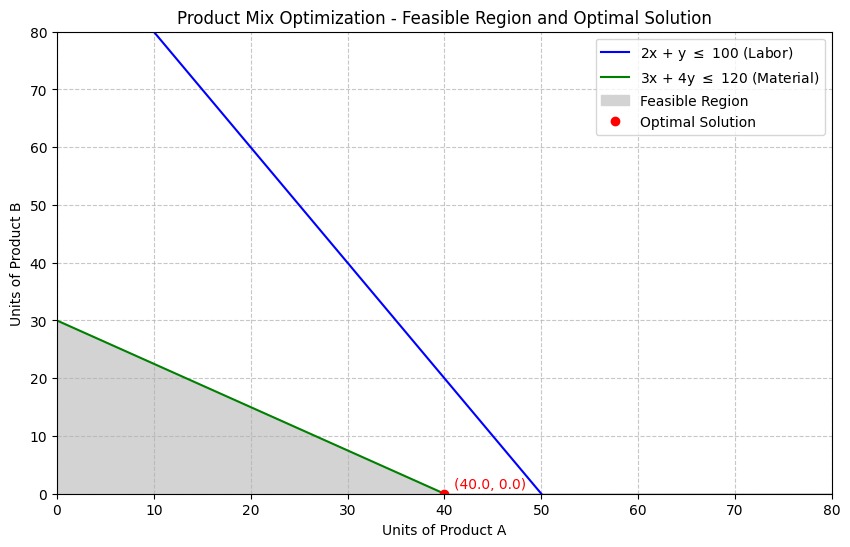

In [2]:
# Install PuLP (if not already installed)
# !pip install pulp matplotlib

from pulp import LpMaximize, LpProblem, LpVariable, value
import matplotlib.pyplot as plt
import numpy as np

# ---------------------
# 1. Define LP Problem
# ---------------------
model = LpProblem("Product-Mix-Optimization", LpMaximize)

# Decision variables
x = LpVariable("Product_A", lowBound=0, cat="Continuous")
y = LpVariable("Product_B", lowBound=0, cat="Continuous")

# Objective: Maximize profit
model += 40 * x + 30 * y, "Total Profit"

# Constraints
model += 2 * x + 1 * y <= 100, "Labor Constraint"
model += 3 * x + 4 * y <= 120, "Material Constraint"

# Solve the problem
model.solve()

# Optimal values
x_opt = x.varValue
y_opt = y.varValue
profit_opt = value(model.objective)

print("Optimal Solution:")
print("Product A:", x_opt)
print("Product B:", y_opt)
print("Max Profit: $", profit_opt)

# ------------------------
# 2. Visualization Section
# ------------------------

# Create a range for x
x_vals = np.linspace(0, 80, 500)

# Constraint lines
y1 = 100 - 2 * x_vals        # Labor constraint (2x + y <= 100)
y2 = (120 - 3 * x_vals) / 4  # Material constraint (3x + 4y <= 120)

# Plot constraints
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1, label=r'2x + y $\leq$ 100 (Labor)', color='blue')
plt.plot(x_vals, y2, label=r'3x + 4y $\leq$ 120 (Material)', color='green')

# Fill feasible region
y3 = np.minimum(y1, y2)
y3 = np.where(y3 < 0, 0, y3)
plt.fill_between(x_vals, y3, color='lightgray', label='Feasible Region')

# Plot optimal point
plt.plot(x_opt, y_opt, 'ro', label='Optimal Solution')
plt.text(x_opt + 1, y_opt + 1, f'({x_opt}, {y_opt})', color='red')

# Labels and legend
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel("Units of Product A")
plt.ylabel("Units of Product B")
plt.title("Product Mix Optimization - Feasible Region and Optimal Solution")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
